# **Mini Project 01**

#**AKSHAT KUMAR (12240080)**


---



Problem Statement: Develop a multilingual assistive model that helps visually impaired users by describing images in multiple Indian languages and narrating the descriptions via audio.

Workflow:
Use Vision Transformer (ViT)(/Any other model) to perform image classification or object detection, identifying objects in the scene.
Apply IndicTrans2(/Any other model) to translate the generated text descriptions into multiple Indian languages.
Use Whisper Model(/Any other model) to convert the text into speech and narrate the descriptions.

Dataset: You can use publicly available datasets such as MS-COCO for image-captioning tasks, which provide both images and descriptions. For Indian language translations, the FLORES dataset or IndicNLP resources can be helpful.

You are free to use any other datasets as well.


---



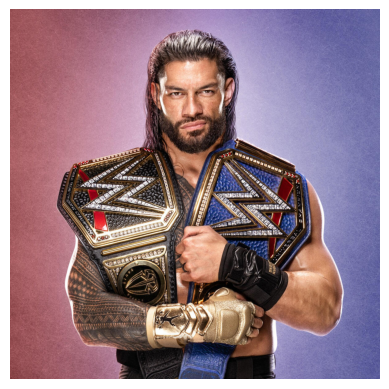

In [12]:
import matplotlib.pyplot as plt
from PIL import Image
import requests
from io import BytesIO

# Replace with the URL of your image
image_url = "https://www.wwe.com/f/styles/gallery_img_l/public/all/2022/04/143_Roman_Reigns_HOC--e8e72261e77fccdbd0a1cab9420d9bc6.jpg"

try:
    # Fetch the image from the URL
    response = requests.get(image_url)
    response.raise_for_status()

    # Open the image using PIL
    img1 = Image.open(BytesIO(response.content))

    # Display the image using matplotlib
    plt.imshow(img1)
    plt.axis('off')  # Turn off axis labels
    plt.show()
except requests.exceptions.RequestException as e:
    print(f"Error fetching the image: {e}")
except IOError as e:
    print(f"Error opening the image: {e}")


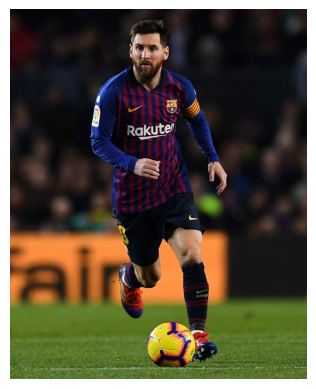

In [14]:
import matplotlib.pyplot as plt
from PIL import Image
import requests
from io import BytesIO

# Replace with the URL of your image
image_url = "https://cdn.britannica.com/34/212134-050-A7289400/Lionel-Messi-2018.jpg"
try:
    # Fetch the image from the URL
    response = requests.get(image_url)
    response.raise_for_status()

    # Open the image using PIL
    img2 = Image.open(BytesIO(response.content))

    # Display the image using matplotlib
    plt.imshow(img2)
    plt.axis('off')  # Turn off axis labels
    plt.show()
except requests.exceptions.RequestException as e:
    print(f"Error fetching the image: {e}")
except IOError as e:
    print(f"Error opening the image: {e}")


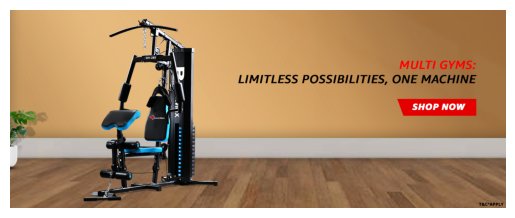

In [15]:
import matplotlib.pyplot as plt
from PIL import Image
import requests
from io import BytesIO

# Replace with the URL of your image
image_url = "https://www.powermaxfitness.net/uploads/1709902116_banner_08032024181836.jpg"
try:
    # Fetch the image from the URL
    response = requests.get(image_url)
    response.raise_for_status()

    # Open the image using PIL
    img3 = Image.open(BytesIO(response.content))

    # Display the image using matplotlib
    plt.imshow(img3)
    plt.axis('off')  # Turn off axis labels
    plt.show()
except requests.exceptions.RequestException as e:
    print(f"Error fetching the image: {e}")
except IOError as e:
    print(f"Error opening the image: {e}")


#CAPTION GENERATION

In [18]:
from transformers import VisionEncoderDecoderModel, ViTImageProcessor, AutoTokenizer
import torch
from PIL import Image

model = VisionEncoderDecoderModel.from_pretrained("nlpconnect/vit-gpt2-image-captioning")
feature_extractor = ViTImageProcessor.from_pretrained("nlpconnect/vit-gpt2-image-captioning")
tokenizer = AutoTokenizer.from_pretrained("nlpconnect/vit-gpt2-image-captioning")

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

max_length = 16
num_beams = 4
gen_kwargs = {"max_length": max_length, "num_beams": num_beams}

def predict_step(images):
    # Check if images is a list of PIL Image objects
    if not all(isinstance(img, Image.Image) for img in images):
        raise ValueError("All items in the 'images' list must be PIL Image objects")

    # Preprocess the images
    pixel_values = feature_extractor(images=images, return_tensors="pt").pixel_values
    pixel_values = pixel_values.to(device)

    # Generate captions
    output_ids = model.generate(pixel_values, **gen_kwargs)

    # Decode and return the captions
    preds = tokenizer.batch_decode(output_ids, skip_special_tokens=True)
    preds = [pred.strip() for pred in preds]
    return preds


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [19]:
caption_1 = predict_step([img1])
caption_2 = predict_step([img2])
caption_3 = predict_step([img3])

The attention mask is not set and cannot be inferred from input because pad token is same as eos token. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
We strongly recommend passing in an `attention_mask` since your input_ids may be padded. See https://huggingface.co/docs/transformers/troubleshooting#incorrect-output-when-padding-tokens-arent-masked.
You may ignore this warning if your `pad_token_id` (50256) is identical to the `bos_token_id` (50256), `eos_token_id` (50256), or the `sep_token_id` (None), and your input is not padded.


In [21]:
print(caption_1)
print(caption_2)
print(caption_3)

['a man in a baseball uniform holding a baseball bat']
['a man kicking a soccer ball on a field']
['a bicycle rack with a surfboard on top of it']


### Downloading the IndicTransToolkit for Language Translations

In [22]:
!git clone https://github.com/VarunGumma/IndicTransToolkit.git
%cd IndicTransToolkit

Cloning into 'IndicTransToolkit'...
remote: Enumerating objects: 155, done.
remote: Counting objects: 100% (60/60), done.
remote: Compressing objects: 100% (28/28), done.
remote: Total 155 (delta 34), reused 45 (delta 30), pack-reused 95 (from 1)
Receiving objects: 100% (155/155), 3.88 MiB | 11.54 MiB/s, done.
Resolving deltas: 100% (62/62), done.
/content/IndicTransToolkit


In [23]:
!pip install --editable ./

Obtaining file:///content/IndicTransToolkit
  Preparing metadata (setup.py) ... done
  Cloning https://github.com/VarunGumma/indic_nlp_library to /tmp/pip-install-61bxxs7o/indic-nlp-library-it2_36888e4b3f9040e485743f154b8a1d04
  Running command git clone --filter=blob:none --quiet https://github.com/VarunGumma/indic_nlp_library /tmp/pip-install-61bxxs7o/indic-nlp-library-it2_36888e4b3f9040e485743f154b8a1d04
  Resolved https://github.com/VarunGumma/indic_nlp_library to commit 601521e05ed0ed8f2165ac317a47d186e25b6f0d
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.8/51.8 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.0/104.0 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 897.5/897.5 kB 18.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 46.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.7/572.7 kB 25.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

#FOR HINDI

In [27]:
import torch
from transformers import (
    AutoModelForSeq2SeqLM,
    AutoTokenizer,
)
from IndicTransToolkit import IndicProcessor

model_name = "ai4bharat/indictrans2-en-indic-1B"
tokenizer = AutoTokenizer.from_pretrained(model_name, trust_remote_code=True)
model = AutoModelForSeq2SeqLM.from_pretrained(model_name, trust_remote_code=True)
ip = IndicProcessor(inference=True)

"""input_sentences = [
    "a man wearing a baseball uniform holding a baseball bat",  # Example 1
    "a man kicking a soccer ball on a field",                   # Example 2
    "a bicycle is attached to a wooden frame"                   # Example 3
]
]
"""


src_lang, tgt_lang = "eng_Latn" , "hin_Deva"

# Convert captions to strings if they are lists
caption_1 = caption_1[0] if isinstance(caption_1, list) else caption_1
caption_2 = caption_2[0] if isinstance(caption_2, list) else caption_2
caption_3 = caption_3[0] if isinstance(caption_3, list) else caption_3

batch = ip.preprocess_batch(
    [caption_1, caption_2, caption_3], # Pass captions as a list
    src_lang=src_lang,
    tgt_lang=tgt_lang,
)

DEVICE = "cuda" if torch.cuda.is_available() else "cpu"

# Tokenize the sentences and generate input encodings
inputs = tokenizer(
    batch,
    truncation=True,
    padding="longest",
    return_tensors="pt",
    return_attention_mask=True,
).to(DEVICE)

# Generate translations using the model
with torch.no_grad():
    generated_tokens = model.generate(
        **inputs,
        use_cache=True,
        min_length=0,
        max_length=256,
        num_beams=5,
        num_return_sequences=1,
    )

# Decode the generated tokens into text
with tokenizer.as_target_tokenizer():
    generated_tokens = tokenizer.batch_decode(
        generated_tokens.detach().cpu().tolist(),
        skip_special_tokens=True,
        clean_up_tokenization_spaces=True,
    )

# Postprocess the translations, including entity replacement
translations = ip.postprocess_batch(generated_tokens, lang=tgt_lang)

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:4126: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(


In [29]:
# Example lists of captions and translations
captions = [caption_1, caption_2, caption_3]
# Print each caption and its translation
for i, (caption, translation) in enumerate(zip(captions, translations)): # Use enumerate to get the index
    print(f"{src_lang}: {caption}")
    print(f"{tgt_lang}: {translation}")

eng_Latn: a man in a baseball uniform holding a baseball bat
hin_Deva: बेसबॉल की वर्दी में एक आदमी बेसबॉल का बल्ला पकड़े हुए 
eng_Latn: a man kicking a soccer ball on a field
hin_Deva: एक आदमी मैदान पर फुटबॉल की गेंद को लात मार रहा है 
eng_Latn: a bicycle rack with a surfboard on top of it
hin_Deva: इसके ऊपर एक सर्फ़बोर्ड के साथ एक साइकिल रैक 


### Using gtts (Google Text to Speech) for for Voice Translation

In [32]:
!pip install gtts  # Install the gtts library

from gtts import gTTS
from IPython.display import Audio, display

# Function to convert text to speech and play in Colab
def text_to_speech_colab(text, lang='hi'):
    tts = gTTS(text=text, lang=lang)
    tts.save('speech.mp3')  # Save the speech as an MP3 file
    return Audio('speech.mp3', autoplay=True)  # Play the MP3 file directly in Colab

# Example lists of captions and translations
captions = [caption_1, caption_2, caption_3]  # Replace with actual captions
# Use the existing 'translations' list instead of undefined variables.
translations = translations # Replace with actual translations

# Define source and target languages
src_lang = "English"  # Replace with actual source language
tgt_lang = "Hindi"    # Replace with actual target language

# Print each caption and its translation, and convert each to speech
for i, (caption, translation) in enumerate(zip(captions, translations)):
    print(f"{src_lang}: {caption}")
    print(f"{tgt_lang}: {translation}")

    # Convert caption and translation to speech and play
    print(f"Playing caption {i+1}...")
    display(text_to_speech_colab(caption, lang='en'))  # Convert caption to speech and play
    print(f"Playing translation {i+1}...")
    display(text_to_speech_colab(translation, lang='hi'))  # Convert translation to speech and play

English: a man in a baseball uniform holding a baseball bat
Hindi: बेसबॉल की वर्दी में एक आदमी बेसबॉल का बल्ला पकड़े हुए 
Playing caption 1...


Playing translation 1...


English: a man kicking a soccer ball on a field
Hindi: एक आदमी मैदान पर फुटबॉल की गेंद को लात मार रहा है 
Playing caption 2...


Playing translation 2...


English: a bicycle rack with a surfboard on top of it
Hindi: इसके ऊपर एक सर्फ़बोर्ड के साथ एक साइकिल रैक 
Playing caption 3...


Playing translation 3...


#FOR BENGALI

In [34]:
import torch
from transformers import (
    AutoModelForSeq2SeqLM,
    AutoTokenizer,
)
from IndicTransToolkit import IndicProcessor

model_name = "ai4bharat/indictrans2-en-indic-1B"
tokenizer = AutoTokenizer.from_pretrained(model_name, trust_remote_code=True)
model = AutoModelForSeq2SeqLM.from_pretrained(model_name, trust_remote_code=True)
ip = IndicProcessor(inference=True)

# Replace example captions with actual captions
caption_1 = "a man wearing a baseball uniform holding a baseball bat"
caption_2 = "a man kicking a soccer ball on a field"
caption_3 = "a bicycle is attached to a wooden frame"

src_lang, tgt_lang = "eng_Latn", "ben_Beng"  # Update to Bengali code

# Convert captions to strings if they are lists
caption_1 = caption_1[0] if isinstance(caption_1, list) else caption_1
caption_2 = caption_2[0] if isinstance(caption_2, list) else caption_2
caption_3 = caption_3[0] if isinstance(caption_3, list) else caption_3

batch = ip.preprocess_batch(
    [caption_1, caption_2, caption_3],  # Pass captions as a list
    src_lang=src_lang,
    tgt_lang=tgt_lang,
)

DEVICE = "cuda" if torch.cuda.is_available() else "cpu"

# Tokenize the sentences and generate input encodings
inputs = tokenizer(
    batch,
    truncation=True,
    padding="longest",
    return_tensors="pt",
    return_attention_mask=True,
).to(DEVICE)

# Generate translations using the model
with torch.no_grad():
    generated_tokens = model.generate(
        **inputs,
        use_cache=True,
        min_length=0,
        max_length=256,
        num_beams=5,
        num_return_sequences=1,
    )

# Decode the generated tokens into text
with tokenizer.as_target_tokenizer():
    translations = tokenizer.batch_decode(
        generated_tokens.detach().cpu().tolist(),
        skip_special_tokens=True,
        clean_up_tokenization_spaces=True,
    )

# Function to convert text to speech and play in Colab
from gtts import gTTS
from IPython.display import Audio, display

def text_to_speech_colab(text, lang='bn'):  # Update lang to Bengali code
    tts = gTTS(text=text, lang=lang)
    tts.save('speech.mp3')  # Save the speech as an MP3 file
    return Audio('speech.mp3', autoplay=True)  # Play the MP3 file directly in Colab

# Define source and target languages
src_lang_name = "English"
tgt_lang_name = "Bengali"

# Print each caption and its translation, and convert each to speech
for i, (caption, translation) in enumerate(zip([caption_1, caption_2, caption_3], translations)):
    print(f"{src_lang_name}: {caption}")
    print(f"{tgt_lang_name}: {translation}")

    # Convert caption and translation to speech and play
    print(f"Playing caption {i+1}...")
    display(text_to_speech_colab(caption, lang='en'))  # Convert caption to speech and play
    print(f"Playing translation {i+1}...")
    display(text_to_speech_colab(translation, lang='bn'))  # Convert translation to speech and play


English: a man wearing a baseball uniform holding a baseball bat
Bengali: बेसबलेर इउनिफर्म परिहित एकजन ब्यक्ति बेसबल ब्याट धरे आछेन 
Playing caption 1...


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:4126: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(


Playing translation 1...


English: a man kicking a soccer ball on a field
Bengali: एकजन लोक माठे एकटि फुटबल बलके लाथि मारछे 
Playing caption 2...


Playing translation 2...


English: a bicycle is attached to a wooden frame
Bengali: एकटि साइकेल एकटि काठेर फ्रेमे संयुक्त करा हय़ 
Playing caption 3...


Playing translation 3...


---

1. **Image Captioning with Vision Transformer (ViT)**
   - **Objective:** To generate a descriptive sentence that accurately represents the content of the image.
   - **Model:** Vision Transformer (ViT) is utilized to understand and describe the image.
   - **Steps:**
     - **Input:** An image either uploaded by the user or captured via a camera.
     - **Preprocessing:** The image is resized and normalized as required by the ViT model.
     - **Image Captioning:** The preprocessed image is passed through the ViT model to generate a natural language description of the objects and scene.

2. **Translation with IndicTransToolkit**
   - **Objective:** To translate the English caption into Indian languages, allowing the user to receive the caption in their preferred language.
   - **Model:** IndicTransToolkit is employed to translate the English captions into various Indian languages such as Hindi, Tamil, Bengali, Marathi, etc.
   - **Steps:**
     - **Input:** The English caption generated by the ViT model.
     - **Translation:** Utilize IndicTransToolkit to convert the English caption into the selected Indian language (e.g., Hindi, Bengali, Tamil).

3. **Text-to-Speech with gTTS**
   - **Objective:** To provide an audio narration of the translated caption in the user’s chosen language.
   - **Model:** gTTS (Google Text-to-Speech) converts the translated text into speech.
   - **Steps:**
     - **Input:** The translated text from the previous step.
     - **Text-to-Speech Conversion:** Use gTTS to generate an audio file of the translated caption and provide audio narration in the selected language.

This methodology combines advanced image processing, translation, and speech synthesis technologies to deliver a comprehensive, multilingual, and audio-visual description of images, catering to diverse user needs.


---

